<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
 #import os
 #os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
#Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# from keras.callbacks import TensorBoard

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras

2024-10-15 20:52:22.024608: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tensorflow.keras import layers

In [5]:
from tensorflow.keras.datasets import cifar10


In [6]:
from tensorflow.keras.utils import to_categorical



## Load data
Use the **Keras**' load method.

In [7]:
# insert code here
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Check some data

In [8]:
# insert code here
print ("X_train shape:", X_train.shape)


X_train shape: (50000, 32, 32, 3)


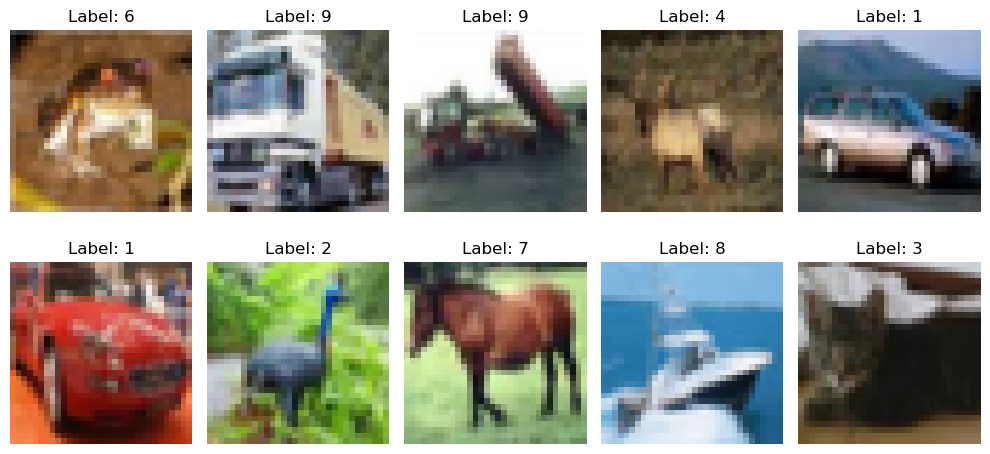

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # Corrected to subplots
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])  # Display the i-th image
    ax.set_title(f'Label: {y_train[i][0]}')  
    ax.axis('off')  

plt.tight_layout()
plt.show()  # Added parentheses to call show


## Prepare data

In [10]:
# insert code here
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') /255.0

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [11]:
# insert code here
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D


In [12]:
# Assuming X_train is defined and contains your image data
# For example, let's check the shape of X_train
print(X_train.shape)  # Should output (number_of_samples, height, width, channels)

# Define height and width based on the shape of the data
num_samples, height, width, channels = X_train.shape

# Output the dimensions
print(f"Height: {height}, Width: {width}, Channels: {channels}")


(50000, 32, 32, 3)
Height: 32, Width: 32, Channels: 3


In [13]:
# Initialize the model
model = Sequential()

# Adjusted input shape for RGB images (3 channels)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # Flatten the output
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print the model summary to confirm the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## Compile the model

In [14]:
# insert code here
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Use mean_squared_error for regression


## Fit the training data

In [21]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

NameError: name 'TensorBoard' is not defined

In [23]:
from tensorflow.keras.callbacks import TensorBoard


In [25]:
tensorboard = TensorBoard(log_dir = 'logs')

In [26]:
!pip install tensorboard


In [16]:
!pip show tensorboard


Name: tensorboard
Version: 2.18.0
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: absl-py, grpcio, markdown, numpy, packaging, protobuf, setuptools, six, tensorboard-data-server, werkzeug
Required-by: 


In [18]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%%time
# insert code here

#
# ..., callbacks = [tensorboard], ...

In [29]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)          # Only transform the testing data

# Build the Keras model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Set up TensorBoard callback
log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model to the training data with TensorBoard callback
history = model.fit(
    X_train_scaled,  # Training data
    y_train,         # Target values
    epochs=100,      # Number of epochs
    batch_size=32,   # Size of each batch
    validation_split=0.2,  # Use 20% of training data for validation
    callbacks=[tensorboard_callback]  # Add the TensorBoard callback
)


Epoch 1/100
9/9 [==============================] - 1s 37ms/step - loss: 31534.4473 - mae: 158.6569 - val_loss: 22382.2656 - val_mae: 133.7125
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 31361.9570 - mae: 158.1066 - val_loss: 22237.8965 - val_mae: 133.1692
Epoch 3/100
9/9 [==============================] - 0s 15ms/step - loss: 31184.9531 - mae: 157.5352 - val_loss: 22086.3281 - val_mae: 132.5969
Epoch 4/100
9/9 [==============================] - 0s 17ms/step - loss: 30979.7559 - mae: 156.8869 - val_loss: 21910.8379 - val_mae: 131.9328
Epoch 5/100
9/9 [==============================] - 0s 16ms/step - loss: 30737.3789 - mae: 156.1214 - val_loss: 21695.9531 - val_mae: 131.1265
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 30433.2559 - mae: 155.1646 - val_loss: 21426.1152 - val_mae: 130.1204
Epoch 7/100
9/9 [==============================] - 0s 16ms/step - loss: 30044.0645 - mae: 153.9487 - val_loss: 21092.5195 - val_mae: 128.8878
Epoch 

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit.
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [32]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Could not find '/path/to/tensorboard' (set by the
`TENSORBOARD_BINARY` environment variable). Please ensure that your
PATH contains an executable `tensorboard` program, or explicitly
specify the path to a TensorBoard binary by setting the
`TENSORBOARD_BINARY` environment variable.

## Create predictions

In [ ]:
%%time
predictions = model.predict_classes(X_test)

In [34]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# View the first few predicted values
print("Predictions (first 5):")
print(predictions.flatten())  


3/3 [==============================] - 0s 8ms/step
Predictions (first 5):
[159.21959  194.87125  145.9688   331.83862   92.80066  106.27491
 257.71643  173.57727   88.88438   68.54337   95.556145 181.09282
  95.249596 206.74384   71.58153  107.90527  218.80746  259.27716
 231.61725  207.89359  210.28548  106.71019   63.102524 189.9292
 139.13245  159.46463  187.70496  193.65598   70.49685   82.73655
 170.74942  111.29081   97.38305  173.06502  173.56296  168.19229
  89.13249   90.93868  154.73413   80.0175    66.62892  124.60721
 178.99997  182.32555  160.02328   89.34693  105.81353  122.94579
  69.85437  143.87488  150.81671  117.55282  117.11652   81.35751
 186.28523  138.83539   78.9826   215.47198  101.80932   90.96531
 171.23476  198.58826   99.15136   88.41679  130.54071  226.86395
 157.71358  167.1105   151.81512  133.15479  174.25504  169.84975
 268.92282  131.18858   99.79456  175.41446  167.42355  195.36386
 136.52716  205.9148   110.60784  142.21725   81.03738   73.91066
  8

## Evaluate the model

In [35]:
# insert code here
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²): {r2:.3f}")


Mean Absolute Error (MAE): 43.590
Mean Squared Error (MSE): 3001.008
R-squared (R²): 0.434


## Visualisation of cost

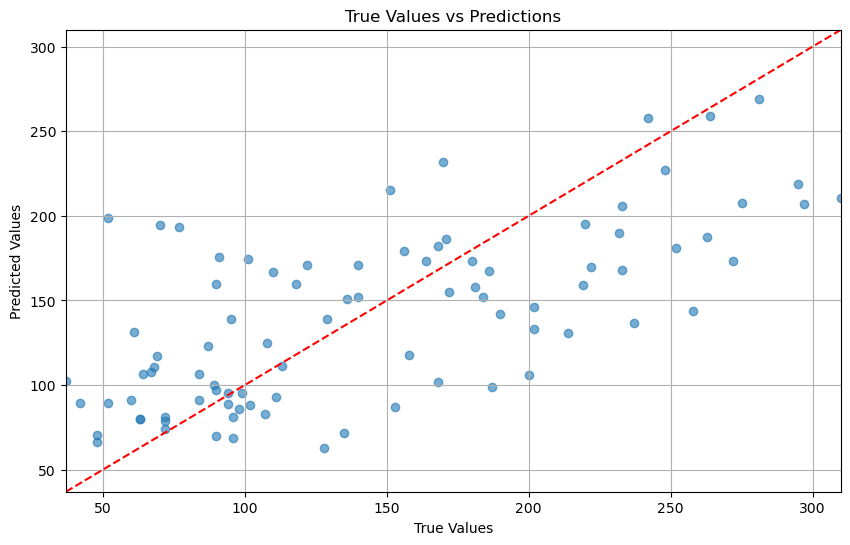

In [36]:
# insert code here
import matplotlib.pyplot as plt

# Create a scatter plot to visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Identity line
plt.title('True Values vs Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid(True)
plt.show()


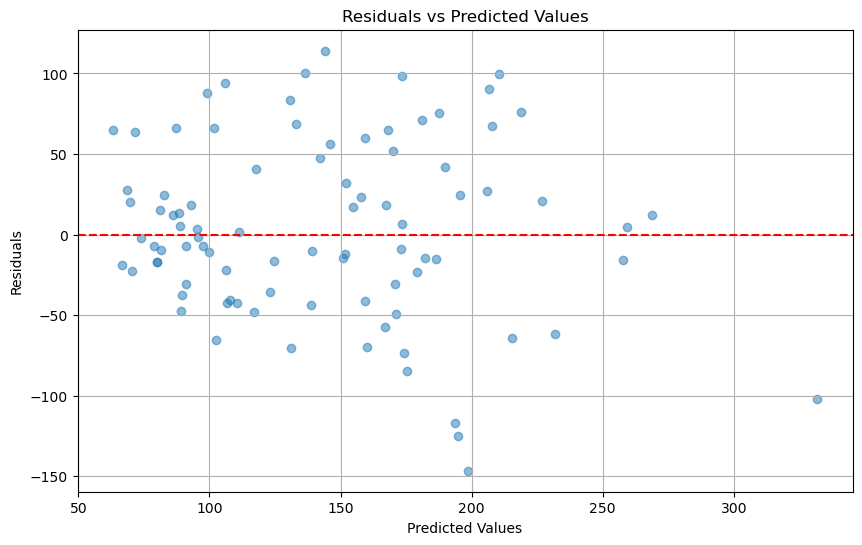

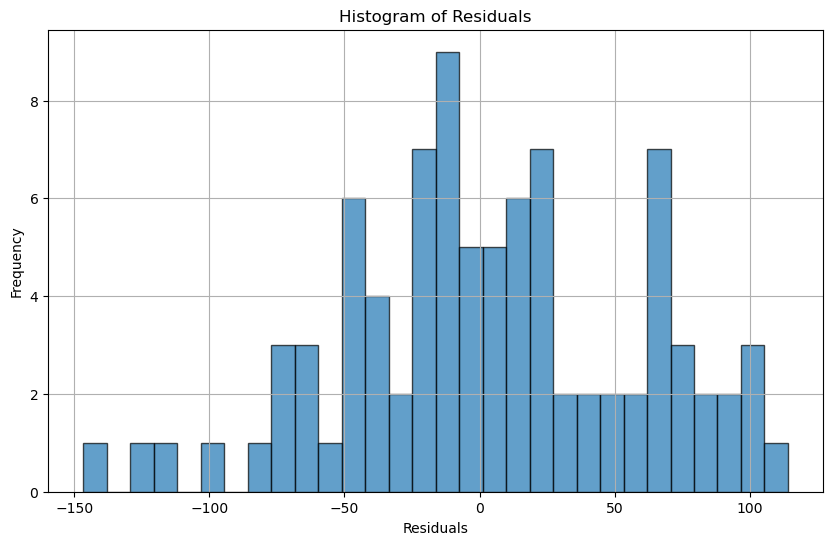

In [37]:
# Calculate residuals
residuals = y_test - predictions.flatten()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Line at 0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Results

In [ ]:
# insert code here
This graph shows how the model's loss (error) changes over epochs for both the training set and validation set.



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



